# Preparing vaccination data.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Loading data

In [2]:
df_base = pd.read_csv('data/output/df_base_without_missing_points.csv', index_col=0)

In [3]:
df_base.columns

Index(['code_municipality_7', 'municipality', 'population', 'latitude',
       'longitude', 'percentage_population_age_range_0_19',
       'percentage_population_age_range_20_39',
       'percentage_population_age_range_40_59',
       'percentage_population_age_range_60_more',
       'percentage_urban_population', 'demographic_density',
       'average_residents_per_households',
       'percentage_population_in_households_more_2_residents_per_bedroom',
       'percentage_male_population', 'percentage_indigenous_population',
       'percentage_black_and_brown_population', 'life_expectancy_at_birth',
       'per_capita_income', 'gini', 'per_capita_cash_transfer_program',
       'percentage_estimated_households_in_informal_settlements',
       'percentage_population_in_informal_settlements',
       'demographic_density_in_informal_settlements',
       'percentage_population_in_households_without_bathroom',
       'percentage_hospitalizations_diseases_inadequate_sanitation',
       'activi

In [4]:
df_base['code_municipality_6'] = df_base['code_municipality_7'].astype('str').str[:6].astype('int64')

In [5]:
df_base = df_base[['code_municipality_6', 'code_municipality_7','population']].copy()

In [6]:
df_vaccination_base = pd.read_csv('data/input/df_vaccination.csv')[['date', 'id_municipality', 'cumulative_doses', 'cumulative_vaccinated_people', 'cumulative_full_vaccinated_people']].copy()
df_vaccination_base['date'] = pd.to_datetime(df_vaccination_base['date'])

In [7]:
df_vaccination_base = df_vaccination_base.rename(columns={'id_municipality': 'code_municipality_6'})

## Summary vaccination by years

In [8]:
END_FIRST_SEMESTER_2020 = datetime.fromisoformat('2020-06-30')
END_2020 = datetime.fromisoformat('2020-12-31')
END_2021 = datetime.fromisoformat('2021-12-31')
END_2022 = datetime.fromisoformat('2022-12-31')

In [9]:
df_vaccination_end_study = df_vaccination_base[df_vaccination_base.date == END_2022].dropna().copy()

In [10]:
df_vaccination_end_study

,date,code_municipality_6,cumulative_doses,cumulative_vaccinated_people,cumulative_full_vaccinated_people
713,2022-12-31,510600.0,15941,5903,5379
1427,2022-12-31,130270.0,84052,33740,28795
2141,2022-12-31,411900.0,14094,5305,5031
2855,2022-12-31,312620.0,17290,6874,6140
3569,2022-12-31,220260.0,70867,23844,22644
...,...,...,...,...,...
4021961,2022-12-31,431275.0,8792,3402,3201
4022675,2022-12-31,290195.0,16713,6537,5585
4023389,2022-12-31,430607.0,7322,2453,2383
4024103,2022-12-31,291060.0,79338,29727,26456


In [11]:
df_vaccination = df_base.merge(df_vaccination_end_study, how='left', left_on='code_municipality_6', right_on='code_municipality_6')
df_vaccination.index = df_base.index

In [12]:
df_vaccination['doses_by_100_inhabitants'] = df_vaccination['cumulative_doses'] / df_vaccination['population'] * 100
df_vaccination['percentual_vaccinated_people'] = df_vaccination['cumulative_vaccinated_people'] / df_vaccination['population'] * 100
df_vaccination['percentual_full_vaccinated_people'] = df_vaccination['cumulative_full_vaccinated_people'] / df_vaccination['population'] * 100

In [13]:
df_vaccination['cumulative_vaccinated_people'].sum() / df_vaccination['population'].sum() * 100 

94.59455190006807

In [14]:
df_vaccination['cumulative_full_vaccinated_people'].sum() / df_vaccination['population'].sum() * 100

86.48529447876594

In [15]:
df_vaccination['cumulative_doses'].sum() / df_vaccination['population'].sum() * 100

246.97412794349165

In [16]:
len(df_vaccination[df_vaccination['percentual_full_vaccinated_people']>100])

748

In [17]:
len(df_vaccination[df_vaccination['percentual_vaccinated_people'] > 100])

1604

In [18]:
df_vaccination[['doses_by_100_inhabitants','percentual_vaccinated_people','percentual_full_vaccinated_people']].describe()

,doses_by_100_inhabitants,percentual_vaccinated_people,percentual_full_vaccinated_people
count,5560.000000,5560.000000,5560.000000
mean,252.217527,92.905532,85.054682
std,51.985538,13.665951,15.015775
min,54.951553,28.761755,20.604161
25%,221.453397,85.685712,76.729088
50%,254.209076,93.725916,86.084676
75%,285.154380,101.398789,94.802414
max,576.494388,272.261072,185.434612


In [19]:
df_vaccination[['population','doses_by_100_inhabitants','percentual_vaccinated_people','percentual_full_vaccinated_people']]

,population,doses_by_100_inhabitants,percentual_vaccinated_people,percentual_full_vaccinated_people
0,21495,234.007909,98.469411,88.020470
1,96833,199.507399,87.948323,73.607138
2,5363,233.805706,95.599478,85.008391
3,86895,204.131423,86.322573,73.868462
4,15890,217.954688,89.955947,78.747640
...,...,...,...,...
5565,14956,273.321744,95.801016,91.327895
5566,8768,282.151004,109.990876,98.471715
5567,4215,213.950178,87.852906,73.736655
5568,5815,239.191745,92.656922,82.631126


In [20]:
df_vaccination_base

,date,code_municipality_6,cumulative_doses,cumulative_vaccinated_people,cumulative_full_vaccinated_people
0,2021-01-17,510600.0,0,0,0
1,2021-01-18,510600.0,0,0,0
2,2021-01-19,510600.0,8,8,0
3,2021-01-20,510600.0,35,34,0
4,2021-01-21,510600.0,36,35,0
...,...,...,...,...,...
4024813,2022-12-27,251630.0,54553,18722,17737
4024814,2022-12-28,251630.0,54559,18724,17737
4024815,2022-12-29,251630.0,54561,18726,17737
4024816,2022-12-30,251630.0,54562,18726,17737


In [21]:
df_vaccination_base.columns

Index(['date', 'code_municipality_6', 'cumulative_doses',
       'cumulative_vaccinated_people', 'cumulative_full_vaccinated_people'],
      dtype='object')

In [22]:
df_vaccination.columns

Index(['code_municipality_6', 'code_municipality_7', 'population', 'date',
       'cumulative_doses', 'cumulative_vaccinated_people',
       'cumulative_full_vaccinated_people', 'doses_by_100_inhabitants',
       'percentual_vaccinated_people', 'percentual_full_vaccinated_people'],
      dtype='object')

In [22]:
END_2022.strftime('%Y-%m-%d')
for moment, column_moment_base in zip([END_FIRST_SEMESTER_2020, END_2020, END_2021], ['accumulated_first_semester_2020', 'accumulated_2020', 'accumulated_2021']):
    column_total_doses = 'total_doses_' + column_moment_base
    column_vaccinated_people = 'vaccinated_people_' + column_moment_base
    column_full_vaccinated_people = 'full_vaccinated_people_' + column_moment_base
    df = df_vaccination_base[df_vaccination_base.date == moment].dropna().copy()
    df = df.rename(columns = {'cumulative_doses': column_total_doses, 'cumulative_vaccinated_people': column_vaccinated_people, 'cumulative_full_vaccinated_people': column_full_vaccinated_people})
    df_vaccination = df_vaccination.merge(df[['code_municipality_6', column_total_doses, column_vaccinated_people, column_full_vaccinated_people]], how='left', left_on='code_municipality_6', right_on='code_municipality_6')
    df_vaccination.index = df_base.index
    df_vaccination[column_total_doses] = df_vaccination[column_total_doses].fillna(0)
    df_vaccination[column_vaccinated_people] = df_vaccination[column_vaccinated_people].fillna(0)
    df_vaccination[column_full_vaccinated_people] = df_vaccination[column_full_vaccinated_people].fillna(0)
    df_vaccination['doses_by_100_inhabitants_'+column_moment_base] = df_vaccination[column_total_doses] / df_vaccination['population'] * 100
    df_vaccination['percentual_vaccinated_people_'+column_moment_base] = df_vaccination[column_vaccinated_people] / df_vaccination['population'] * 100
    df_vaccination['percentual_full_vaccinated_people_'+column_moment_base] = df_vaccination[column_full_vaccinated_people] / df_vaccination['population'] * 100

In [23]:
df_vaccination

,code_municipality_6,code_municipality_7,population,date,cumulative_doses,cumulative_vaccinated_people,cumulative_full_vaccinated_people,doses_by_100_inhabitants,percentual_vaccinated_people,percentual_full_vaccinated_people,...,full_vaccinated_people_accumulated_2020,doses_by_100_inhabitants_accumulated_2020,percentual_vaccinated_people_accumulated_2020,percentual_full_vaccinated_people_accumulated_2020,total_doses_accumulated_2021,vaccinated_people_accumulated_2021,full_vaccinated_people_accumulated_2021,doses_by_100_inhabitants_accumulated_2021,percentual_vaccinated_people_accumulated_2021,percentual_full_vaccinated_people_accumulated_2021
0,110001,1100015,21495,2022-12-31,50300,21166,18920,234.007909,98.469411,88.020470,...,0.0,0.0,0.0,0.0,40100,19567,17248,186.555013,91.030472,80.241917
1,110002,1100023,96833,2022-12-31,193189,85163,71276,199.507399,87.948323,73.607138,...,0.0,0.0,0.0,0.0,158943,80542,66124,164.141357,83.176190,68.286638
2,110003,1100031,5363,2022-12-31,12539,5127,4559,233.805706,95.599478,85.008391,...,0.0,0.0,0.0,0.0,9721,4745,4117,181.260489,88.476599,76.766735
3,110004,1100049,86895,2022-12-31,177380,75010,64188,204.131423,86.322573,73.868462,...,0.0,0.0,0.0,0.0,139026,70499,58567,159.993095,81.131250,67.399735
4,110005,1100056,15890,2022-12-31,34633,14294,12513,217.954688,89.955947,78.747640,...,0.0,0.0,0.0,0.0,26936,13282,11335,169.515419,83.587162,71.334172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,14956,2022-12-31,40878,14328,13659,273.321744,95.801016,91.327895,...,0.0,0.0,0.0,0.0,27068,12741,11667,180.984220,85.189890,78.008826
5566,522205,5222054,8768,2022-12-31,24739,9644,8634,282.151004,109.990876,98.471715,...,0.0,0.0,0.0,0.0,17659,8792,7763,201.402828,100.273723,88.537865
5567,522220,5222203,4215,2022-12-31,9018,3703,3108,213.950178,87.852906,73.736655,...,0.0,0.0,0.0,0.0,6176,3216,2560,146.524318,76.298932,60.735469
5568,522230,5222302,5815,2022-12-31,13909,5388,4805,239.191745,92.656922,82.631126,...,0.0,0.0,0.0,0.0,9758,4855,4282,167.807395,83.490972,73.637145


In [24]:
df_vaccination.columns

Index(['code_municipality_6', 'code_municipality_7', 'population', 'date',
       'cumulative_doses', 'cumulative_vaccinated_people',
       'cumulative_full_vaccinated_people', 'doses_by_100_inhabitants',
       'percentual_vaccinated_people', 'percentual_full_vaccinated_people',
       'total_doses_accumulated_first_semester_2020',
       'vaccinated_people_accumulated_first_semester_2020',
       'full_vaccinated_people_accumulated_first_semester_2020',
       'doses_by_100_inhabitants_accumulated_first_semester_2020',
       'percentual_vaccinated_people_accumulated_first_semester_2020',
       'percentual_full_vaccinated_people_accumulated_first_semester_2020',
       'total_doses_accumulated_2020', 'vaccinated_people_accumulated_2020',
       'full_vaccinated_people_accumulated_2020',
       'doses_by_100_inhabitants_accumulated_2020',
       'percentual_vaccinated_people_accumulated_2020',
       'percentual_full_vaccinated_people_accumulated_2020',
       'total_doses_accumulat

In [25]:
df_vaccination[['doses_by_100_inhabitants_accumulated_first_semester_2020', 'doses_by_100_inhabitants_accumulated_2020', 'doses_by_100_inhabitants_accumulated_2021', 'doses_by_100_inhabitants']].describe()

,doses_by_100_inhabitants_accumulated_first_semester_2020,doses_by_100_inhabitants_accumulated_2020,doses_by_100_inhabitants_accumulated_2021,doses_by_100_inhabitants
count,5560.0,5560.0,5560.000000,5560.000000
mean,0.0,0.0,171.097584,252.217527
std,0.0,0.0,33.128193,51.985538
min,0.0,0.0,44.492733,54.951553
25%,0.0,0.0,152.002114,221.453397
50%,0.0,0.0,172.454352,254.209076
75%,0.0,0.0,191.885799,285.154380
max,0.0,0.0,383.124511,576.494388


In [26]:
df_vaccination[['percentual_vaccinated_people_accumulated_first_semester_2020', 'percentual_vaccinated_people_accumulated_2020', 'percentual_vaccinated_people_accumulated_2021', 'percentual_vaccinated_people']].describe()

,percentual_vaccinated_people_accumulated_first_semester_2020,percentual_vaccinated_people_accumulated_2020,percentual_vaccinated_people_accumulated_2021,percentual_vaccinated_people
count,5560.0,5560.0,5560.000000,5560.000000
mean,0.0,0.0,82.470323,92.905532
std,0.0,0.0,12.631646,13.665951
min,0.0,0.0,25.719578,28.761755
25%,0.0,0.0,75.924695,85.685712
50%,0.0,0.0,83.510206,93.725916
75%,0.0,0.0,90.412427,101.398789
max,0.0,0.0,177.682067,272.261072


In [27]:
df_vaccination[['percentual_full_vaccinated_people_accumulated_first_semester_2020', 'percentual_full_vaccinated_people_accumulated_2020', 'percentual_full_vaccinated_people_accumulated_2021', 'percentual_full_vaccinated_people']].describe()

,percentual_full_vaccinated_people_accumulated_first_semester_2020,percentual_full_vaccinated_people_accumulated_2020,percentual_full_vaccinated_people_accumulated_2021,percentual_full_vaccinated_people
count,5560.0,5560.0,5560.000000,5560.000000
mean,0.0,0.0,73.315485,85.054682
std,0.0,0.0,14.262652,15.015775
min,0.0,0.0,17.740097,20.604161
25%,0.0,0.0,65.284391,76.729088
50%,0.0,0.0,74.430212,86.084676
75%,0.0,0.0,82.658893,94.802414
max,0.0,0.0,166.001044,185.434612


In [28]:
dict_column_labels = {'doses_by_100_inhabitants_accumulated_first_semester_2020': 'Doses per 100 people (1/2020)',
                      'doses_by_100_inhabitants_accumulated_2020': 'Doses per 100 people (2020)',
                      'doses_by_100_inhabitants_accumulated_2021': 'Doses per 100 people (2020-2021)',
                      'doses_by_100_inhabitants': 'Doses per 100 people (2020-2022)',
                      'percentual_vaccinated_people_accumulated_first_semester_2020': '% people vaccinated (1/2020)',
                      'percentual_vaccinated_people_accumulated_2020': '% people vaccinated (2020)',
                      'percentual_vaccinated_people_accumulated_2021': '% people vaccinated (2020-2021)',
                      'percentual_vaccinated_people': '% people vaccinated (2020-2022)',
                      'percentual_full_vaccinated_people_accumulated_first_semester_2020': '% people fully vaccinated (1/2020)',
                      'percentual_full_vaccinated_people_accumulated_2020': '% people fully vaccinated (2020)',
                      'percentual_full_vaccinated_people_accumulated_2021': '% people fully vaccinated (2020-2021)',
                      'percentual_full_vaccinated_people': '% people fully vaccinated (2020-2022)'}

In [29]:
df_vaccination = df_vaccination.rename(columns=dict_column_labels)

## Setting vaccination time series

In [29]:
df_time_series_vaccination = df_vaccination_base[df_vaccination_base['code_municipality_6'].isin(df_vaccination['code_municipality_6'].unique())].copy()

## Boxplot vaccination

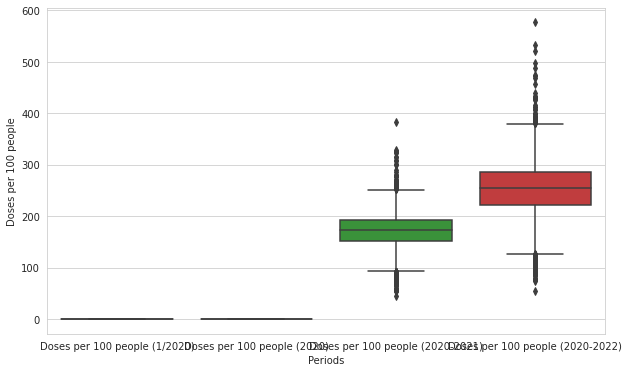

In [31]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df_vaccination[['Doses per 100 people (1/2020)', 'Doses per 100 people (2020)', 'Doses per 100 people (2020-2021)', 'Doses per 100 people (2020-2022)']])

# Customize the plot
plt.ylabel('Doses per 100 people')
plt.xlabel('Periods')

# Show the plot
plt.show()

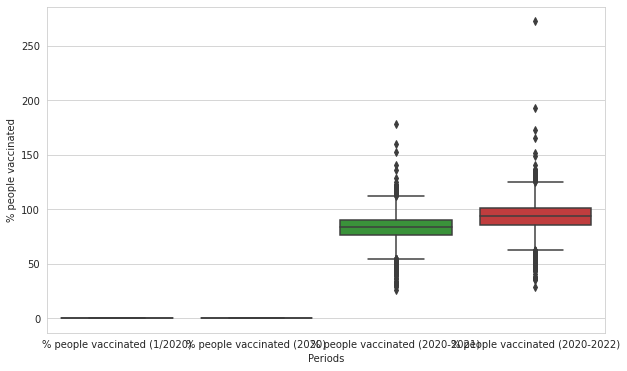

In [32]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df_vaccination[['% people vaccinated (1/2020)', '% people vaccinated (2020)', '% people vaccinated (2020-2021)', '% people vaccinated (2020-2022)']])

# Customize the plot
plt.ylabel('% people vaccinated')
plt.xlabel('Periods')

# Show the plot
plt.show()

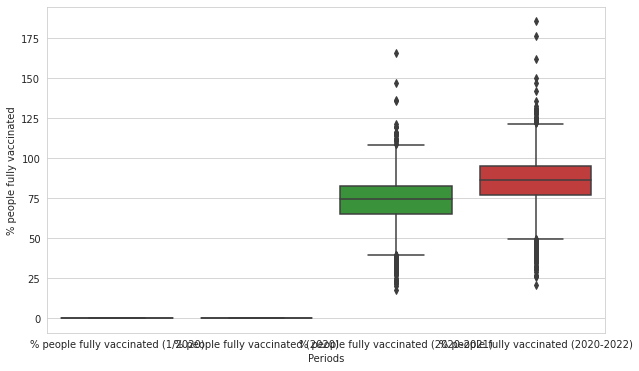

In [33]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df_vaccination[['% people fully vaccinated (1/2020)', '% people fully vaccinated (2020)', '% people fully vaccinated (2020-2021)', '% people fully vaccinated (2020-2022)']])

# Customize the plot
plt.ylabel('% people fully vaccinated')
plt.xlabel('Periods')

# Show the plot
plt.show()

## Saving data

In [34]:
filename = 'data/output/df_vaccination.csv'
df_vaccination.to_csv(filename, index=True)

In [30]:
df_time_series_vaccination.to_csv('data/output/df_time_series_vaccination.csv', index=False)

In [35]:
df_vaccination

,code_municipality_6,code_municipality_7,population,date,cumulative_doses,cumulative_vaccinated_people,cumulative_full_vaccinated_people,Doses per 100 people (2020-2022),% people vaccinated (2020-2022),% people fully vaccinated (2020-2022),...,full_vaccinated_people_accumulated_2020,Doses per 100 people (2020),% people vaccinated (2020),% people fully vaccinated (2020),total_doses_accumulated_2021,vaccinated_people_accumulated_2021,full_vaccinated_people_accumulated_2021,Doses per 100 people (2020-2021),% people vaccinated (2020-2021),% people fully vaccinated (2020-2021)
0,110001,1100015,21495,2022-12-31,50300,21166,18920,234.007909,98.469411,88.020470,...,0.0,0.0,0.0,0.0,40100,19567,17248,186.555013,91.030472,80.241917
1,110002,1100023,96833,2022-12-31,193189,85163,71276,199.507399,87.948323,73.607138,...,0.0,0.0,0.0,0.0,158943,80542,66124,164.141357,83.176190,68.286638
2,110003,1100031,5363,2022-12-31,12539,5127,4559,233.805706,95.599478,85.008391,...,0.0,0.0,0.0,0.0,9721,4745,4117,181.260489,88.476599,76.766735
3,110004,1100049,86895,2022-12-31,177380,75010,64188,204.131423,86.322573,73.868462,...,0.0,0.0,0.0,0.0,139026,70499,58567,159.993095,81.131250,67.399735
4,110005,1100056,15890,2022-12-31,34633,14294,12513,217.954688,89.955947,78.747640,...,0.0,0.0,0.0,0.0,26936,13282,11335,169.515419,83.587162,71.334172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,5222005,14956,2022-12-31,40878,14328,13659,273.321744,95.801016,91.327895,...,0.0,0.0,0.0,0.0,27068,12741,11667,180.984220,85.189890,78.008826
5566,522205,5222054,8768,2022-12-31,24739,9644,8634,282.151004,109.990876,98.471715,...,0.0,0.0,0.0,0.0,17659,8792,7763,201.402828,100.273723,88.537865
5567,522220,5222203,4215,2022-12-31,9018,3703,3108,213.950178,87.852906,73.736655,...,0.0,0.0,0.0,0.0,6176,3216,2560,146.524318,76.298932,60.735469
5568,522230,5222302,5815,2022-12-31,13909,5388,4805,239.191745,92.656922,82.631126,...,0.0,0.0,0.0,0.0,9758,4855,4282,167.807395,83.490972,73.637145
